In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
oriental_weavers = pd.read_excel(
    './data/Oriental Weavers(01-01-2013 till 01-01-2018).xls', index_col=1)
nasr_housing = pd.read_excel(
    './data/Medinet Nasr Housing(01-01-2013 till 01-01-2018).xls', index_col=1)
suez_cement = pd.read_excel(
    './data/Suez Cement(01-01-2013 till 01-01-2018).xls', index_col=1)
tmg_holding = pd.read_excel(
    './data/T M G Holding(01-01-2013 till 01-01-2018).xls', index_col=1)
telecom_egypt = pd.read_excel(
    './data/Telecom Egypt(01-01-2013 till 01-01-2018).xls', index_col=1)

In [3]:
nasr_housing.head()

,SYMBOL_CODE,TRADE_VOLUME,TRADE_VALUE,TRADE_COUNT,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE
TRADE_DATE,,,,,,,,
2013-01-02,EGS65571C019,103941,2582112.50,119,24.39,25.05,24.02,24.84
2013-01-03,EGS65571C019,232703,5961554.06,167,24.70,26.00,24.70,25.62
2013-01-06,EGS65571C019,76886,1956936.75,117,25.30,25.85,25.07,25.45
2013-01-08,EGS65571C019,64687,1620033.52,91,25.16,25.16,24.87,25.04
2013-01-09,EGS65571C019,49786,1242881.47,62,25.04,25.19,24.66,24.96


In [4]:
def preprocess_add_features(df):
    df['SMA_20'] = df['CLOSE_PRICE'].rolling(20).mean()
    df['EWMA_12'] = df['CLOSE_PRICE'].ewm(span = 12).mean()
    df['HL_PCT'] = (df['HIGH_PRICE'] - df['LOW_PRICE']) / df['LOW_PRICE'] * 100.0
    df['Return'] = df['CLOSE_PRICE'].pct_change()
    return df

In [5]:
df = preprocess_add_features(tmg_holding)
df.dropna(inplace=True)

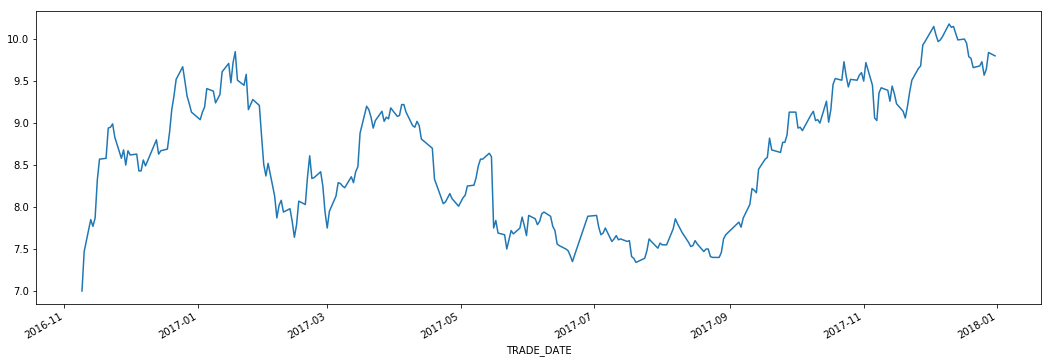

In [6]:
df['CLOSE_PRICE'][-280:].plot(figsize=(18,6))


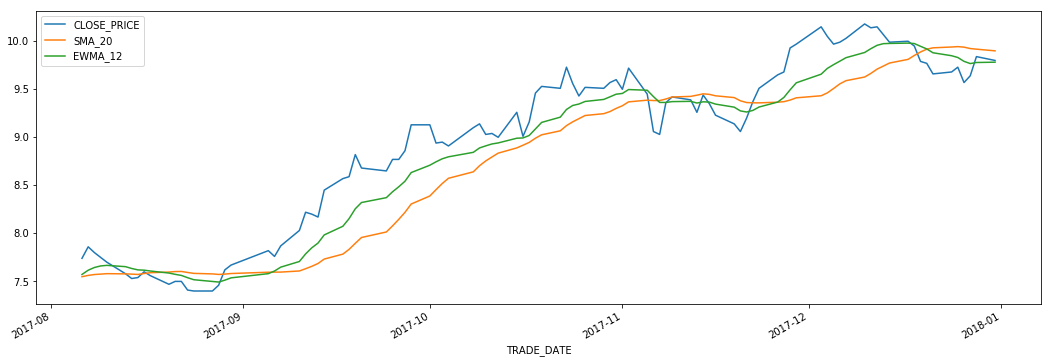

In [7]:
df[['CLOSE_PRICE','SMA_20','EWMA_12']][-100:].plot(figsize=(18,6))
plt.show()

In [8]:
df.tail()

,SYMBOL_CODE,TRADE_VOLUME,TRADE_VALUE,TRADE_COUNT,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE,SMA_20,EWMA_12,HL_PCT,Return
TRADE_DATE,,,,,,,,,,,,
2017-12-25,EGS691S1C011,2550914,24808931.74,332,9.70,9.83,9.55,9.73,9.9440,9.830905,2.931937,0.005165
2017-12-26,EGS691S1C011,952893,9123532.62,271,9.70,9.70,9.51,9.57,9.9385,9.790766,1.997897,-0.016444
2017-12-27,EGS691S1C011,2670503,25737256.31,425,9.64,9.76,9.54,9.64,9.9240,9.767571,2.306080,0.007315
2017-12-28,EGS691S1C011,4395442,43235515.01,521,9.60,9.92,9.60,9.84,9.9175,9.778714,3.333333,0.020747
2017-12-31,EGS691S1C011,876400,8591940.29,202,9.75,9.91,9.70,9.80,9.9000,9.781989,2.164948,-0.004065


In [9]:

X = df[['EWMA_12','HL_PCT','Return','TRADE_COUNT']].values

y = df['CLOSE_PRICE'].values
len(X), len(y)

(1201, 1201)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.03,shuffle=False,random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02,random_state=1)

In [11]:
X_train.shape , X_test.shape, y_train.shape,y_test.shape

((1164, 4), (37, 4), (1164,), (37,))

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [25]:
from sklearn.linear_model import LinearRegression,LassoLars
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
LR = LinearRegression()
KNN = KNeighborsRegressor()
SVR = svm.SVR()
LL = LassoLars()
DTR = DecisionTreeRegressor(max_depth=10)
bag = BaggingRegressor()

In [27]:
LR.fit(X_train, y_train)
SVR.fit(X_train ,y_train)
KNN.fit(X_train, y_train)
LL.fit(X_train,y_train)
DTR.fit(X_train,y_train)
bag.fit(X_train,y_train)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [28]:
y_pred_LR = LR.predict(X_test)
y_pred_SVR = SVR.predict(X_test)
y_pred_KNN = KNN.predict(X_test)
y_pred_LL = LL.predict(X_test)
y_pred_DTR = DTR.predict(X_test)
y_pred_bag = bag.predict(X_test)

In [40]:
slice_start= X_train.shape[0]
df['KNN_pred'] = np.nan
df['SVR_pred'] = np.nan
df['LR_pred'] = np.nan
df['LL_pred'] = np.nan
df['DTR_pred'] = np.nan
df['Bag_pred'] = np.nan
df['KNN_pred'].iloc[slice_start:] = y_pred_KNN
df['SVR_pred'].iloc[slice_start:] = y_pred_SVR
df['LR_pred'].iloc[slice_start:] = y_pred_LR
df['LL_pred'].iloc[slice_start:] = y_pred_LL
df['DTR_pred'].iloc[slice_start:] = y_pred_DTR
df['Bag_pred'].iloc[slice_start:] = y_pred_bag
df['avg_pred'] = np.nan
df['avg_pred'].iloc[slice_start:] = (y_pred_KNN + y_pred_SVR + y_pred_bag)/3
                                  
df.tail()

C:\Users\runmd\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,SYMBOL_CODE,TRADE_VOLUME,TRADE_VALUE,TRADE_COUNT,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE,SMA_20,EWMA_12,HL_PCT,Return,KNN_pred,SVR_pred,LR_pred,LL_pred,DTR_pred,Bag_pred,avg_pred
TRADE_DATE,,,,,,,,,,,,,,,,,,,
2017-12-25,EGS691S1C011,2550914,24808931.74,332,9.70,9.83,9.55,9.73,9.9440,9.830905,2.931937,0.005165,9.428,9.930740,9.869370,7.420266,9.890,9.921,9.759913
2017-12-26,EGS691S1C011,952893,9123532.62,271,9.70,9.70,9.51,9.57,9.9385,9.790766,1.997897,-0.016444,9.896,9.708256,9.692199,7.420266,9.840,9.741,9.781752
2017-12-27,EGS691S1C011,2670503,25737256.31,425,9.64,9.76,9.54,9.64,9.9240,9.767571,2.306080,0.007315,9.742,9.974403,9.839091,7.420266,9.890,9.918,9.878134
2017-12-28,EGS691S1C011,4395442,43235515.01,521,9.60,9.92,9.60,9.84,9.9175,9.778714,3.333333,0.020747,10.048,9.906857,9.931139,7.420266,9.562,9.812,9.922286
2017-12-31,EGS691S1C011,876400,8591940.29,202,9.75,9.91,9.70,9.80,9.9000,9.781989,2.164948,-0.004065,9.782,9.829810,9.761474,7.420266,9.840,9.873,9.828270


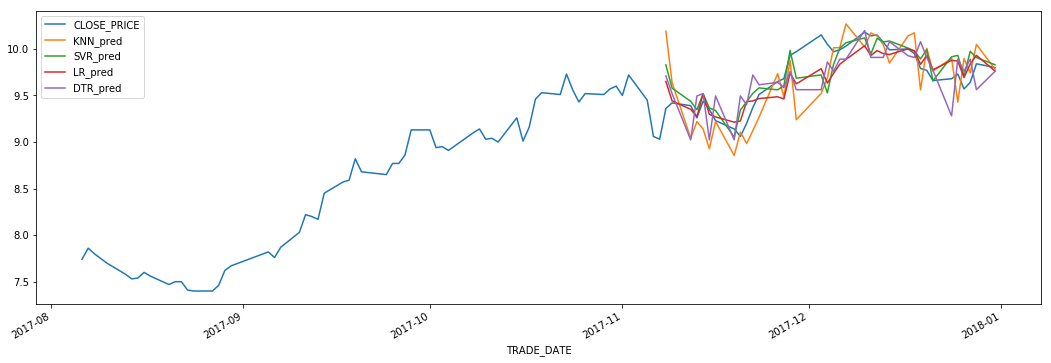

In [17]:
df[['CLOSE_PRICE','KNN_pred','SVR_pred','LR_pred','DTR_pred']][-100:].plot(figsize=(18,6))
plt.show()

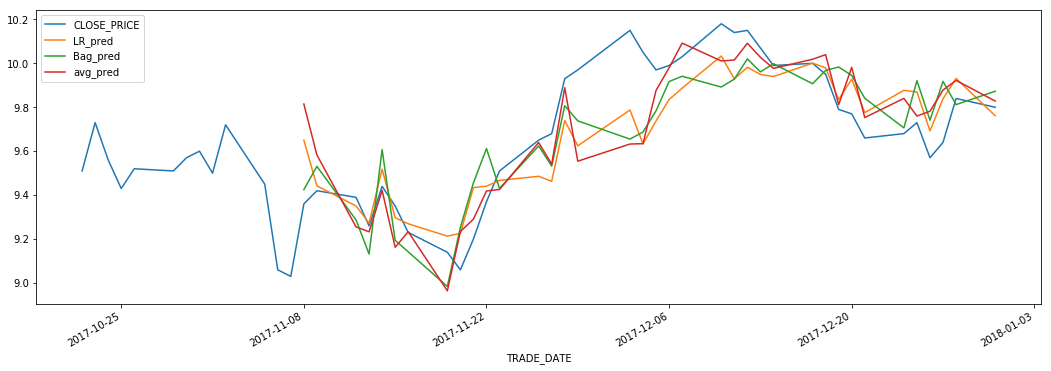

In [41]:
df[['CLOSE_PRICE','LR_pred','Bag_pred','avg_pred']][-50:].plot(figsize=(18,6))
# df['CLOSE_PRICE'][-40:].plot(figsize=(18,6))
plt.legend()
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error

LR_RMSE = np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred_LR))
KNN_RMSE = np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred_KNN))
SVR_RMSE = np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred_SVR))
DTR_RMSE = np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred_DTR))
bag_RMSE = np.sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred_bag))

In [33]:
print('Linear Regression :',LR_RMSE)
print('KNN :',KNN_RMSE)
print('Support Vector Regressor :',SVR_RMSE)
print('DTR :',DTR_RMSE)
print('Bag: ',bag_RMSE)

Linear Regression : 0.172448269052
KNN : 0.288391813056
Support Vector Regressor : 0.191955343412
DTR : 0.25436602173
Bag:  0.182171733649


In [42]:
np.square(np.subtract(y_test,y_pred_bag)).mean()

0.033186540540540696

In [21]:
# LR.fit(X, y)
# SVR.fit(X ,y)
# KNN.fit(X, y)
# LL.fit(X,y)
# DTR.fit(X,y)

# y_pred_LR = LR.predict(X_test)
# y_pred_SVR = SVR.predict(X_test)
# y_pred_KNN = KNN.predict(X_test)
# y_pred_LL = LL.predict(X_test)
# y_pred_DTR = DTR.predict(X_test)

# slice_start= X_test.shape[0]

# df['KNN_pred'] = np.nan
# df['SVR_pred'] = np.nan
# df['LR_pred'] = np.nan
# df['LL_pred'] = np.nan
# df['DTR_pred'] = np.nan

# df['LR_pred'].iloc[:slice_start] = y_pred_LR

# df.tail()


In [22]:
# y_pred_LR.shape,y.shape

In [23]:
# df[['CLOSE_PRICE','LR_pred']].plot(figsize=(18,6))
# # plt.show()

In [24]:

# LR_RMSE = np.sqrt(mean_squared_error(y_true=y,y_pred=y_pred_LR))
# # KNN_RMSE = np.sqrt(mean_squared_error(y_true=y,y_pred=y_pred_KNN))
# # SVR_RMSE = np.sqrt(mean_squared_error(y_true=y,y_pred=y_pred_SVR))
# # DTR_RMSE = np.sqrt(mean_squared_error(y_true=y,y_pred=y_pred_DTR))
# print('Linear Regression :',LR_RMSE)
# # print('KNN :',KNN_RMSE)
# # print('Support Vector Regressor :',SVR_RMSE)
# # print('DTR :',DTR_RMSE)